In [277]:
import numpy as np

Crystal 1: a 1-D crystal with unit cell a=100 Angstroms, containing 100 atoms spaced 1 Angstrom apart.  Sample this on a grid of 1600 points.

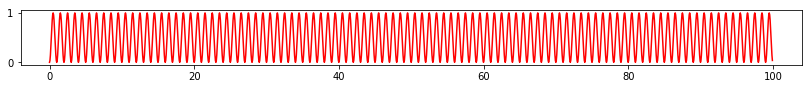

In [278]:
from matplotlib import pyplot as plt
from math import pi,sin
CELL = 100
NPOINT = 1600
NATOMS = 100

xvals = []
yvals = []
for x in range(NPOINT):
    xc = x * NATOMS * pi/float(NPOINT)
    yvals.append( (sin(xc))**2)
    xvals.append(float(CELL)*x/float(NPOINT))
plt.figure(figsize=(14,1))
plt.xlim((-4,104))
plt.plot(xvals,yvals, "r-")
plt.show()


Crystal 1: The molecule is the same.  But the unit cell is expanded to 101 Angstroms.

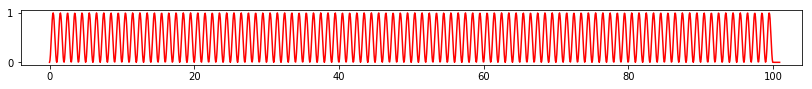

In [279]:
MOLECULE_SZ = 100
CELL2 = 101

xxvals = []
yyvals = []
for x in range(NPOINT):
    frac_molecule = (x/float(NPOINT)) * float(CELL2) / float(MOLECULE_SZ)
    frac_cell = (x/float(NPOINT))
    if frac_molecule <= 1.0:
      xc = frac_molecule * NATOMS * pi
      yyvals.append( (sin(xc))**2)
    else:
      yyvals.append(0.)
    mx = (float(MOLECULE_SZ)/float(CELL2)) * float(CELL2)*x/float(NPOINT)
    xxvals.append(float(CELL2)*x/float(NPOINT))
plt.figure(figsize=(14,1))
plt.xlim((-4,104))
plt.plot(xxvals,yyvals, "r-")
plt.show()

In [280]:
real1 = np.array(yvals)
real2 = np.array(yyvals)
rfft1 = np.fft.rfft(real1)
rfft2 = np.fft.rfft(real2)
rfft1sq = np.abs(rfft1) * np.abs(rfft1)
rfft2sq = np.abs(rfft2) * np.abs(rfft2)

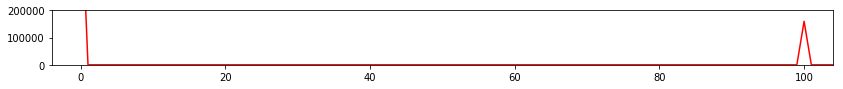

In [281]:
plt.figure(figsize=(14,1))
plt.plot(xrange(len(rfft1sq)),rfft1sq, "r-")
plt.xlim((-4,104))
plt.ylim((0,200000))
plt.show()

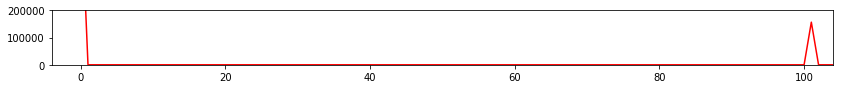

In [282]:
plt.figure(figsize=(14,1))
plt.plot(xrange(len(rfft2sq)),rfft2sq, "r-")
plt.xlim((-4,104))
plt.ylim((0,200000))
plt.show()

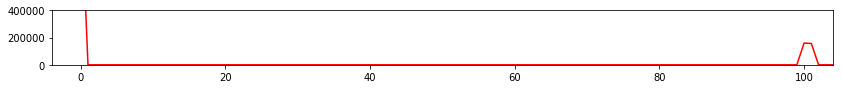

In [283]:
plt.figure(figsize=(14,1))
plt.plot(xrange(len(rfft2sq)),rfft1sq + rfft2sq, "r-")
plt.xlim((-4,104))
plt.ylim((0,400000))
plt.show()

The positive control.  Take the squared amplitudes from crystal 1 (standing in for Bragg spot intensities), along with phases from fft1, and re-synthesize the electron density with a reverse Fourier transform.

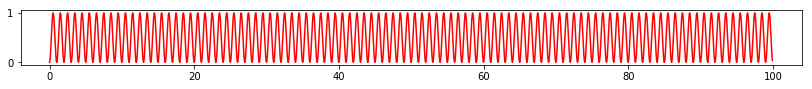

In [284]:
amplitudes = np.sqrt(rfft1sq)
phases = np.angle(rfft1)
coefficients = amplitudes * np.exp(phases*1j)
new_map = np.fft.irfft(coefficients)
plt.figure(figsize=(14,1))
plt.xlim((-4,104))
plt.plot(xvals,new_map, "r-")
plt.show()

The test.  Re-synthesize the electron density again using phases from fft1, but now using average intensities observed from both crystals.  The 1-Angstrom repeat is obliterated in the middle of the unit cell.

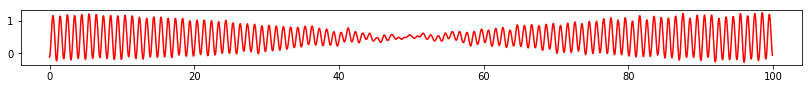

In [285]:
summed = 0.5*(rfft1sq + rfft2sq)
amplitudes2 = np.sqrt(summed)
coefficients2 = amplitudes2 * np.exp(phases*1j)
new_map = np.fft.irfft(coefficients2)
plt.figure(figsize=(14,1))
plt.xlim((-4,104))
plt.plot(xvals,new_map, "r-")
plt.show()